In [1]:
import sys

sys.path.insert(0, "../")
from utils_local import plot_utils
import sympy as sp
import os

from global_config import config

results_dir           = config.get_property('results_dir')
data_dir              = config.get_property('data_dir')
paper_dir             = config.get_property('paper_dir')
figures_dir = os.path.join(results_dir, 'figures')


In [2]:
# Define symbols.
σ, γ, β, α, δ, τ, Nw, κ, θ = sp.symbols('σ γ β α δ τ N κ θ')

# Define variables.
S, C, ε = sp.var('S C ε')

λ    = β * C / Nw + ε

eq1 = sp.Eq(0, (1-0) * σ * Nw - λ * S - δ * S + τ * C)
eq2 = sp.Eq(0,       λ * S    - δ * C - τ * C)
eq3 = sp.Eq(0, θ * C / Nw - κ * ε)

equilibria = [sp.simplify(l) for l in sp.solve([eq1, eq2, eq3], [S, C, ε])]

####-####-####-####
eql0    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[0]]
eql1    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[1]]
####-####-####-####

variables = ["\\bar{S}", "\\bar{C}", "\\bar{\epsilon}"]
for idx_s, l in enumerate(eql0):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))

print( "\n" )

for idx_s, l in enumerate(eql1):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("α", "\\alpha").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))


\bar{S}= \frac{N \sigma}{\delta}
\bar{C}= 0
\bar{\epsilon}= 0


\bar{S}= \frac{N \kappa \left(\delta + \tau\right)}{\beta \kappa + \theta}
\bar{C}= \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \left(\beta \kappa + \theta\right)}
\bar{\epsilon}= \frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \kappa \left(\beta \kappa + \theta\right)}


# Assuming importations are negligible

1. DFE

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \sigma}{\delta}\\
            \bar{C}=& 0\\
            \bar{\epsilon}=&0
        \end{split}
    \end{equation}
2. non-DFE

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \kappa \left(\delta + \tau\right)}{\beta \kappa + \theta}\\
            \bar{C}=& \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \left(\beta \kappa + \theta\right)}\\
            \bar{\epsilon}=& \frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma\right)}{\delta \kappa \left(\beta \kappa + \theta\right)}
        \end{split}
    \end{equation}


In [3]:
# NGM
eq1 = sp.Eq(0, (1-γ) * σ * Nw - λ * S - δ * S + τ * C)
eq2 = sp.Eq(0, γ * σ * Nw     + λ * S - δ * C - τ * C)
eq3 = sp.Eq(0, θ * C / Nw - κ * ε)

f1 = β * S * (C)/Nw + ε * S
f2 = θ * C / Nw

v1 = τ * C + δ * C
v2 = κ * ε

F     = sp.Matrix([f1, f2]); F = F.jacobian([C, ε])
V     = sp.Matrix([v1, v2]); V = V.jacobian([C, ε])
V_inv = V.inv()

Rnots = sp.MatMul(F * V_inv)
Rnots = sp.Matrix(Rnots).subs(S, Nw * σ / δ)
Rnots = list(Rnots.eigenvals().keys())

for idx_l, l in enumerate(Rnots):
    l = sp.simplify(l)
    print(r"$\lambda$_{}=".format(idx_l+1)+""+sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("α", "\\alpha").replace("γ", "\gamma").replace("σ", "\sigma").replace("{2}", "2").replace("{1}", "1"))


$\lambda$_1=\frac{\beta κ \sigma - \sqrt{κ \sigma \left(\beta^2 κ \sigma + 4 \delta^2 θ + 4 \delta θ \tau\right)}}{2 \delta κ \left(\delta + \tau\right)}
$\lambda$_2=\frac{\beta κ \sigma + \sqrt{κ \sigma \left(\beta^2 κ \sigma + 4 \delta^2 θ + 4 \delta θ \tau\right)}}{2 \delta κ \left(\delta + \tau\right)}


# Basic reproduction number

$$\lambda_2=\frac{\beta κ \sigma + \sqrt{κ \sigma \left(\beta^2 κ \sigma + 4 \delta^2 θ + 4 \delta θ \tau\right)}}{2 \delta κ \left(\delta + \tau\right)}$$

$$\mathcal{R}_H =\frac{\beta}{\tau+\delta},\quad \mathcal{R}_E=\frac{\theta}{\kappa(\delta+\tau)}$$

$$\mathcal{R}_0 = \frac{1}{2}\frac{\sigma}{\delta}\mathcal{R}_H +\sqrt{\frac{\sigma}{\delta}\mathcal{R}_E+\frac{1}{4}\frac{\sigma^2}{\delta^2} \mathcal{R}_H}$$

In [4]:
# Considering importations
λ    = β * C / Nw + ε

eq1 = sp.Eq(0, (1-γ) * σ * Nw - λ * S - δ * S + τ * C)
eq2 = sp.Eq(0, γ * σ * Nw + λ * S    - δ * C - τ * C)
eq3 = sp.Eq(0, θ * C / Nw - κ * ε)

equilibria = [sp.simplify(l) for l in sp.solve([eq1, eq2, eq3], [S, C, ε])]

####-####-####-####
eql0    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[0]]
eql1    = [sp.collect(sp.simplify(l), Nw) for l in equilibria[1]]
####-####-####-####

variables = ["\\bar{S}", "\\bar{C}", "\\bar{\epsilon}"]
for idx_s, l in enumerate(eql0):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))

print( "\n" )

for idx_s, l in enumerate(eql1):
    print(variables[idx_s]+"=", sp.latex(l).replace("β", "\\beta").replace("τ", "\\tau").replace("δ", "\delta").replace("α", "\\alpha").replace("γ", "\gamma").replace("σ", "\sigma").replace("κ", "\kappa").replace("θ", "\\theta"))



\bar{S}= \frac{N \left(\beta \kappa \sigma + \delta^{2} \kappa + \delta \kappa \tau + \theta \sigma - \sqrt{\beta^{2} \kappa^{2} \sigma^{2} + 4 \beta \gamma \delta^{2} \kappa^{2} \sigma - 2 \beta \delta^{2} \kappa^{2} \sigma - 2 \beta \delta \kappa^{2} \sigma \tau + 2 \beta \theta \kappa \sigma^{2} + 4 \gamma \delta^{2} \theta \kappa \sigma + \delta^{4} \kappa^{2} + 2 \delta^{3} \kappa^{2} \tau - 2 \delta^{2} \theta \kappa \sigma + \delta^{2} \kappa^{2} \tau^{2} - 2 \delta \theta \kappa \sigma \tau + \theta^{2} \sigma^{2}}\right)}{2 \delta \left(\beta \kappa + \theta\right)}
\bar{C}= \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma + \sqrt{\beta^{2} \kappa^{2} \sigma^{2} + 4 \beta \gamma \delta^{2} \kappa^{2} \sigma - 2 \beta \delta^{2} \kappa^{2} \sigma - 2 \beta \delta \kappa^{2} \sigma \tau + 2 \beta \theta \kappa \sigma^{2} + 4 \gamma \delta^{2} \theta \kappa \sigma + \delta^{4} \kappa^{2} + 2 \delta^{3} \kappa^{2} \tau - 2 \delta^{2} \thet

# Considering importations

1. Equilibrium 1

    $D = \sqrt{\beta^{2} \kappa^{2} \sigma^{2} + 4 \beta \gamma \delta^{2} \kappa^{2} \sigma - 2 \beta \delta^{2} \kappa^{2} \sigma - 2 \beta \delta \kappa^{2} \sigma \tau + 2 \beta \theta \kappa \sigma^{2} + 4 \gamma \delta^{2} \theta \kappa \sigma + \delta^{4} \kappa^{2} + 2 \delta^{3} \kappa^{2} \tau - 2 \delta^{2} \theta \kappa \sigma + \delta^{2} \kappa^{2} \tau^{2} - 2 \delta \theta \kappa \sigma \tau + \theta^{2} \sigma^{2}}$

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \left(\beta \kappa \sigma + \delta^{2} \kappa + \delta \kappa \tau + \theta \sigma - D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{C}=& \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma + D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{\epsilon}=&\frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma + D\right)}{2 \delta \kappa \left(\beta \kappa + \theta\right)}
        \end{split}
    \end{equation}

2. Equilibrium 2

    \begin{equation}
        \begin{split}
            \bar{S}=& \frac{N \left(\beta \kappa \sigma + \delta^{2} \kappa + \delta \kappa \tau + \theta \sigma + D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{C}=& \frac{N \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma - D\right)}{2 \delta \left(\beta \kappa + \theta\right)}\\
            \bar{\epsilon}=& \frac{\theta \left(\beta \kappa \sigma - \delta^{2} \kappa - \delta \kappa \tau + \theta \sigma - D\right)}{2 \delta \kappa \left(\beta \kappa + \theta\right)}
        \end{split}
    \end{equation}





# Stability equilibrium 1

In [5]:
f1 = (1-γ) * σ * Nw - λ * S - δ * S + τ * C
f2 = γ * σ * Nw     + λ * S - δ * C - τ * C
f3 = θ * C / Nw - κ * ε

F        = sp.Matrix([f1, f2, f3]); F = F.jacobian([S, C, ε])
F        = F.subs([(S, eql0[0]), (C, eql0[1]), (ε, eql0[2])])
eig_vals = [sp.factor(sp.simplify(k)) for k in F.eigenvals().keys()]


In [6]:
import pandas as pd
params_sim_df = pd.DataFrame(columns=["γ", "β", "θ", "κ"])

gammas  = [5/100, 25/100, 50/100, 75/100]
kappas  = [1/(1 * 30), 1/(6*30), 1/(12*30)]
betas   = [0.01, 0.025, 0.05, 0.1]
tetas   = [1e-3, 1e-2]

idx_sim = 1

for g in gammas:
    for k in kappas:
        for b in betas:
            for θ in tetas:
                    params_sim_df = pd.concat([params_sim_df, pd.DataFrame.from_dict({"γ": g, "β": b, "θ": θ, "κ": κ, "sim_id": int(idx_sim)}, orient="index").T ], ignore_index=True)
                    idx_sim      += 1

In [7]:
import numpy as np


lamb_vals = sp.symbols('β θ')
arr2df    = np.array([[], [], [], [], [], [], [], [], []])

for g in gammas:
    for k in kappas:
        # eigenvalues
        eig1     = sp.simplify(eig_vals[1].subs([( δ , 1/3 ) , ( σ , 1/3 ), ( τ , 1/120 ), ( γ , g ), ( κ , k )]))
        eig2     = sp.simplify(eig_vals[2].subs([( δ , 1/3 ) , ( σ , 1/3 ), ( τ , 1/120 ), ( γ , g ), ( κ , k )]))

        # equilibrium
        sbar = sp.simplify(eql0[0].subs([( δ , 1/3 ) , ( σ , 1/3 ), ( τ , 1/120 ), ( Nw , 1 ), ( γ , g ), ( κ , k )]))
        cbar = sp.simplify(eql0[1].subs([( δ , 1/3 ) , ( σ , 1/3 ), ( τ , 1/120 ), ( Nw , 1 ), ( γ , g ), ( κ , k )]))
        ebar = sp.simplify(eql0[2].subs([( δ , 1/3 ) , ( σ , 1/3 ), ( τ , 1/120 ), ( Nw , 1 ), ( γ , g ), ( κ , k )]))

        # funcs
        sbar         = sp.lambdify(lamb_vals, sbar)
        cbar         = sp.lambdify(lamb_vals, cbar)
        ebar         = sp.lambdify(lamb_vals, ebar)

        f_eig_vals1 = sp.lambdify(lamb_vals, eig1)
        f_eig_vals2 = sp.lambdify(lamb_vals, eig2)

        tetas      = [1e-4, 1e-3, 1e-2, 1.5e-2]

        kappas_arr = k * np.ones(100)
        gammas_arr = g * np.ones(100)

        for teta in tetas:
            betas_arr = np.linspace(0.01, 0.3, 100)
            tetas_arr = teta * np.ones_like(betas_arr)

            λ1     = f_eig_vals1(betas_arr, tetas_arr)
            λ2     = f_eig_vals2(betas_arr, tetas_arr)

            S_bar  = sbar(betas_arr, tetas_arr)
            C_bar  = cbar(betas_arr, tetas_arr)
            ε_bar  = ebar(betas_arr, tetas_arr)

            λs     = np.concatenate([[λ1], [λ2], [S_bar], [C_bar], [ε_bar],
                                     [betas_arr], [tetas_arr], [kappas_arr], [gammas_arr]])
            arr2df = np.concatenate([arr2df, λs], axis=1)

eigs_df = pd.DataFrame(arr2df.T, columns=["λ1", "λ2", "S", "C", "ε", "β", "θ", "κ", "γ"])


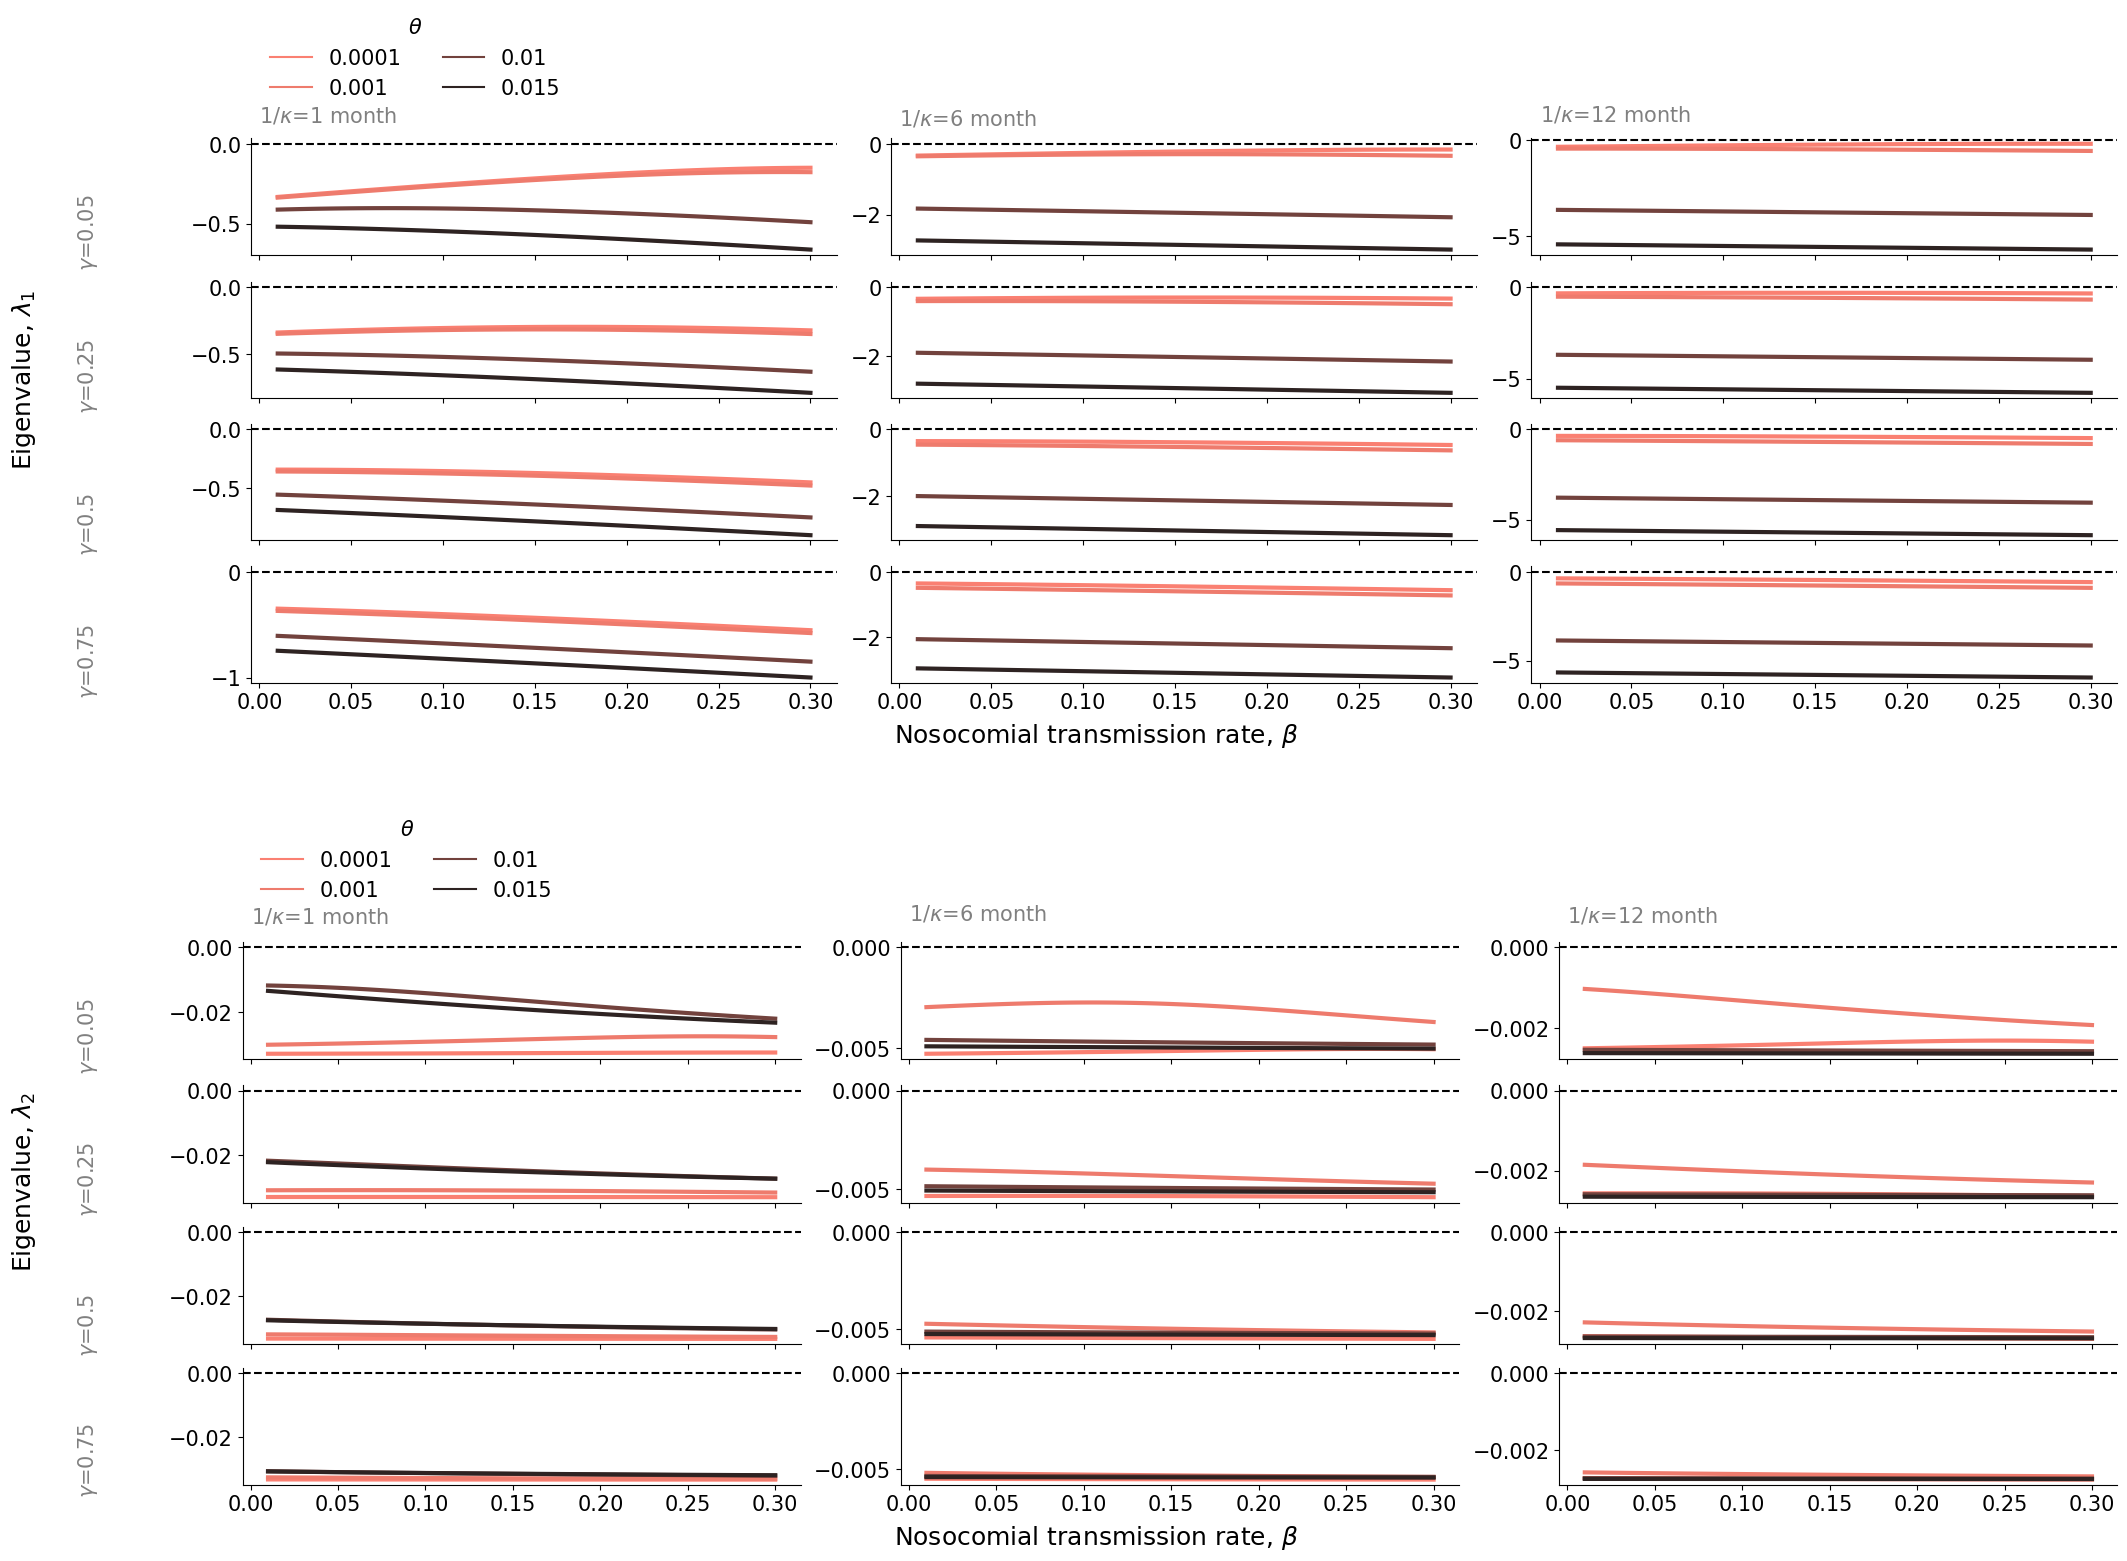

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig     = plt.figure(constrained_layout=True, figsize=(20.5, 15.5))
subfigs = fig.subfigures(2, 1, hspace=0.07, wspace=0.01, height_ratios=[0.5, 0.5])

axes_l1 = subfigs[0].subplots(len(gammas), len(kappas), sharex=True, sharey=False)
axes_l2 = subfigs[1].subplots(len(gammas), len(kappas), sharex=True, sharey=False)

palette_λ = sns.color_palette("dark:salmon_r", as_cmap=True)

for idx_k, kappa in enumerate(kappas):
    for idx_g, g in enumerate(gammas):

        k_eig_df = eigs_df.query(f"γ == {g} and κ == {kappa}")

        sns.lineplot(ax=axes_l1[idx_g, idx_k], data=k_eig_df, x="β", y="λ1",  lw=3, hue="θ", palette=palette_λ)
        sns.lineplot(ax=axes_l2[idx_g, idx_k], data=k_eig_df, x="β", y="λ2",  lw=3, hue="θ", palette=palette_λ)

        if idx_k ==0:
            axes_l1[idx_g, 0].text(x = -0.1,
                            y        = axes_l1[idx_g, 0].get_ylim()[0]*1.1,
                            s        = r"$\gamma$={}".format(g),
                            color    = "gray",
                            rotation = 90)

            axes_l2[idx_g, 0].text(x = -0.1,
                            y        = axes_l2[idx_g, 0].get_ylim()[0]*1.1,
                            s        = r"$\gamma$={}".format(g),
                            color    = "gray",
                            rotation = 90)

        if idx_g ==0:
            axes_l1[0, idx_k].text(x = 0,
                            y        = (np.abs(axes_l1[0, idx_k].get_ylim()[0]) + np.abs(axes_l1[0, idx_k].get_ylim()[1])) * 0.17,
                            s        = r"$1/\kappa$={} month".format(int(1/kappa / 30)),
                            color    = "gray")

            axes_l2[0, idx_k].text(x = 0,
                            y        = (np.abs(axes_l2[0, idx_k].get_ylim()[0])+np.abs(axes_l2[0, idx_k].get_ylim()[1])) * 0.17,
                            s        = r"$1/\kappa$={} month".format(int(1/kappa / 30)),
                            color    = "gray")

for axi in axes_l1.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend().remove()
    axi.set_ylabel(None)
    axi.set_xlabel(None)
    axi.axhline(y=0, color="k", ls="--", lw=1.5)

for axi in axes_l2.flatten():
    axi.axhline(y=0, color="k", ls="--", lw=1.5)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend().remove()
    axi.set_ylabel(None)
    axi.set_xlabel(None)

axes_l1[0, 0].legend(loc="upper left", title=r"$\theta$", ncol=2, bbox_to_anchor=(0.0, 2.2), frameon=False)
axes_l2[0, 0].legend(loc="upper left", title=r"$\theta$", ncol=2, bbox_to_anchor=(0.0, 2.2), frameon=False)

subfigs[0].supylabel(r"Eigenvalue, $\lambda_1$", x=-0.03)
subfigs[1].supylabel(r"Eigenvalue, $\lambda_2$", x=-0.03)

subfigs[0].supxlabel(r"Nosocomial transmission rate, $\beta$")
subfigs[1].supxlabel(r"Nosocomial transmission rate, $\beta$")

fig.savefig(os.path.join(results_dir, "figures", "eigenvalues_eq1_model1.png"),
                                                                        dpi         = 300,
                                                                        transparent = True,
                                                                        bbox_inches = 'tight')

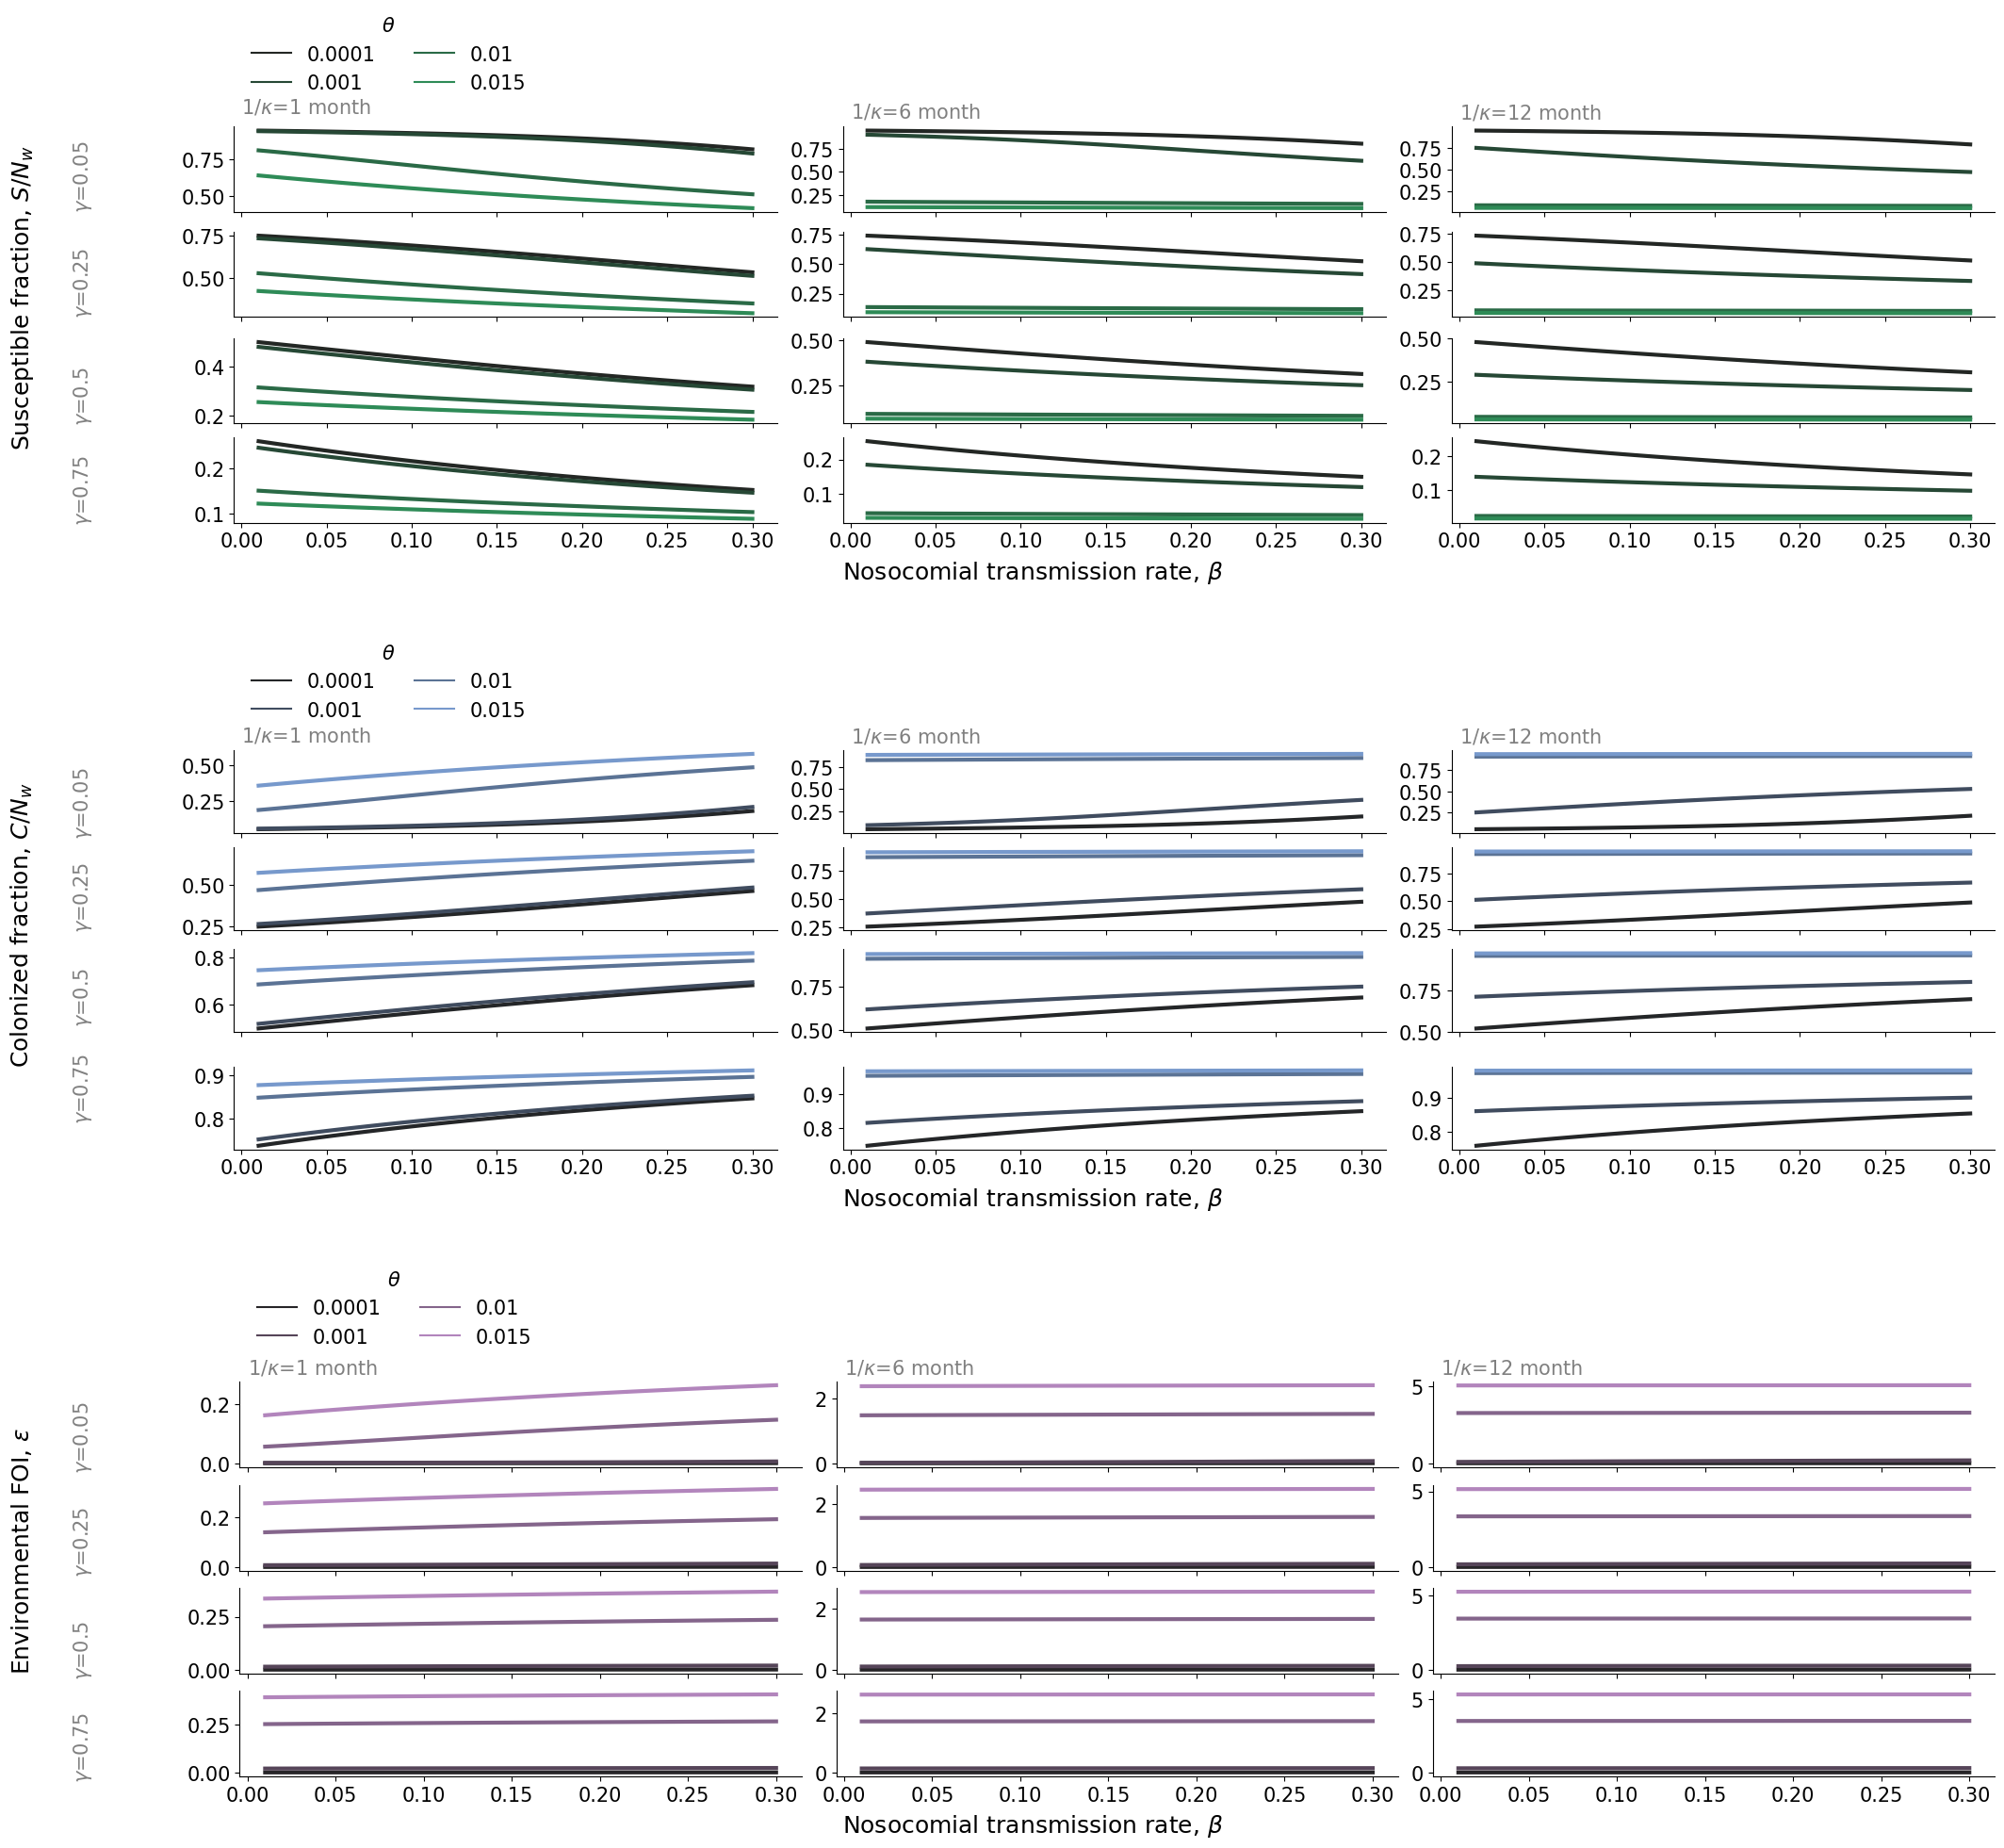

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


palette_s = sns.dark_palette("seagreen", len(tetas))
palette_c = sns.dark_palette("#79C",     len(tetas))
palette_ε = sns.dark_palette("#b285bc",  len(tetas))

fig     = plt.figure(constrained_layout=True, figsize=(20.5, 19.5))
subfigs = fig.subfigures(3, 1, hspace=0.07, wspace=0.01, height_ratios=[0.5, 0.5, 0.5])

axes_l1 = subfigs[0].subplots(len(gammas), len(kappas), sharex=True, sharey=False)
axes_l2 = subfigs[1].subplots(len(gammas), len(kappas), sharex=True, sharey=False)
axes_l3 = subfigs[2].subplots(len(gammas), len(kappas), sharex=True, sharey=False)

for idx_k, kappa in enumerate(kappas):
    for idx_g, g in enumerate(gammas):

        k_eig_df = eigs_df.query(f"γ == {g} and κ == {kappa}")

        # "S", "C", "ε"
        sns.lineplot(ax=axes_l1[idx_g, idx_k], data=k_eig_df, x="β", y="S",  lw=3, hue="θ", palette=palette_s)
        sns.lineplot(ax=axes_l2[idx_g, idx_k], data=k_eig_df, x="β", y="C",  lw=3, hue="θ", palette=palette_c)
        sns.lineplot(ax=axes_l3[idx_g, idx_k], data=k_eig_df, x="β", y="ε",  lw=3, hue="θ", palette=palette_ε)

        if idx_k ==0:
            axes_l1[idx_g, 0].text(x = -0.1,
                            y        = axes_l1[idx_g, 0].get_ylim()[0]*1.1,
                            s        = r"$\gamma$={}".format(g),
                            color    = "gray",
                            rotation = 90)

            axes_l2[idx_g, 0].text(x = -0.1,
                            y        = axes_l2[idx_g, 0].get_ylim()[0]*1.1,
                            s        = r"$\gamma$={}".format(g),
                            color    = "gray",
                            rotation = 90)

            axes_l3[idx_g, 0].text(x = -0.1,
                            y        = axes_l3[idx_g, 0].get_ylim()[0]*1.1,
                            s        = r"$\gamma$={}".format(g),
                            color    = "gray",
                            rotation = 90)

        if idx_g ==0:
            axes_l1[0, idx_k].text(x = 0,
                            y        = np.abs(axes_l1[0, idx_k].get_ylim()[1]) * 1.1,
                            s        = r"$1/\kappa$={} month".format(int(1/kappa / 30)),
                            color    = "gray")

            axes_l2[0, idx_k].text(x = 0,
                            y        = np.abs(axes_l2[0, idx_k].get_ylim()[1]) * 1.1,
                            s        = r"$1/\kappa$={} month".format(int(1/kappa / 30)),
                            color    = "gray")

            axes_l3[0, idx_k].text(x = 0,
                            y        = np.abs(axes_l3[0, idx_k].get_ylim()[1]) * 1.1,
                            s        = r"$1/\kappa$={} month".format(int(1/kappa / 30)),
                            color    = "gray")

for axi in axes_l1.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend().remove()
    axi.set_ylabel(None)
    axi.set_xlabel(None)

for axi in axes_l2.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend().remove()
    axi.set_ylabel(None)
    axi.set_xlabel(None)

for axi in axes_l3.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend().remove()
    axi.set_ylabel(None)
    axi.set_xlabel(None)

axes_l1[0, 0].legend(loc="upper left", title=r"$\theta$", ncol=2, bbox_to_anchor=(0.0, 2.5), frameon=False)
axes_l2[0, 0].legend(loc="upper left", title=r"$\theta$", ncol=2, bbox_to_anchor=(0.0, 2.5), frameon=False)
axes_l3[0, 0].legend(loc="upper left", title=r"$\theta$", ncol=2, bbox_to_anchor=(0.0, 2.5), frameon=False)

subfigs[0].supylabel(r"Susceptible fraction, $S/N_w$", x=-0.03)
subfigs[1].supylabel(r"Colonized fraction, $C/N_w$",   x=-0.03)
subfigs[2].supylabel(r"Environmental FOI, $\epsilon$", x=-0.03)

subfigs[0].supxlabel(r"Nosocomial transmission rate, $\beta$")
subfigs[1].supxlabel(r"Nosocomial transmission rate, $\beta$")
subfigs[2].supxlabel(r"Nosocomial transmission rate, $\beta$")

fig.savefig(os.path.join(results_dir, "figures", "steady_states_eq1_model1.png"),
                                                                        dpi         = 300,
                                                                        transparent = True,
                                                                        bbox_inches = 'tight')
